In [3]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
G = nx.DiGraph()
df = pd.read_csv('2024.csv')
week_num = 4

df['cost'] = (df["xG"] - df["xG.1"]) + (df['Home Score'] - df['Away Score'])

last_three = [week_num-3,week_num-2,week_num-1]

week_1_df = df[df['Wk'].isin(last_three)]
edgelist = list(zip(week_1_df['Home'], week_1_df['Away'], week_1_df['cost']))

mod_edgelist = []
for t in edgelist:
    if t[2] < 0:
        modified_tuple = (t[0], t[1], round(abs(t[2]), 2))
    else:
        modified_tuple = (t[1], t[0], round(t[2], 2))

    mod_edgelist.append(modified_tuple)


nodelist = pd.unique(df['Home'])
# Assuming week_1_df is a pandas DataFrame with columns 'Home', 'Away', and 'cost'
weightlist = dict(zip(zip(mod_edgelist[0], mod_edgelist[1]), mod_edgelist[2]))


for team1, team2, weight in mod_edgelist:
    G.add_edge(team1, team2, weight=weight)
    G.add_edge(team2, team1, weight=-weight)


edge_labels = nx.get_edge_attributes(G, 'weight')

In [16]:
print((nx.dijkstra_path_length(G, "Burnley", "Fulham")))

-2.7


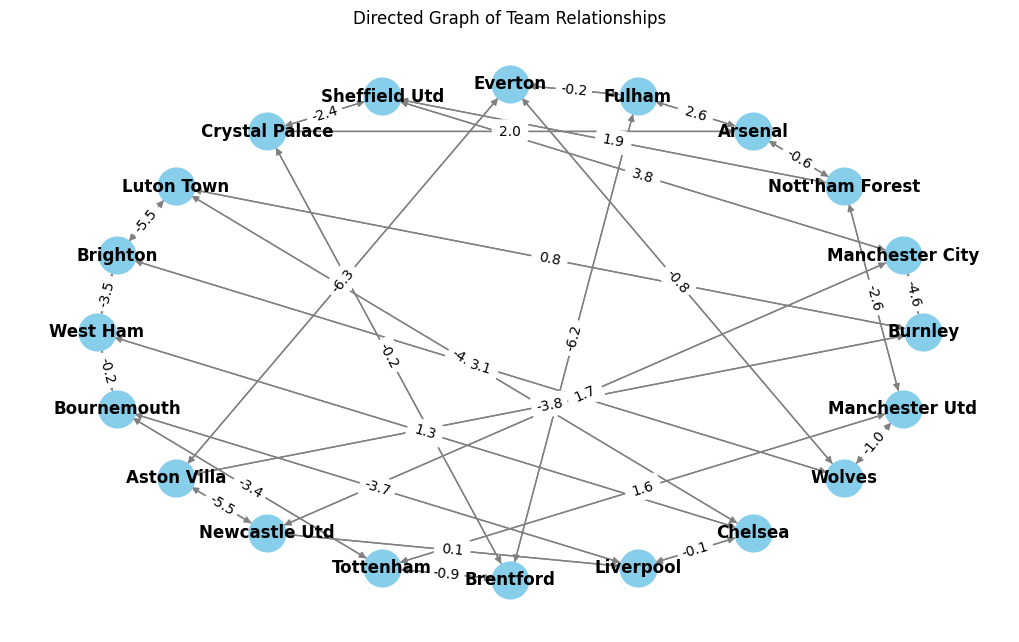

In [11]:
pos = nx.circular_layout(G)
plt.figure(figsize=(10, 6))

nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=700, font_size=12, font_color='black', font_weight='bold', edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Directed Graph of Team Relationships")
plt.show()